
# 📊 Linear Regression from Scratch and with Scikit-Learn

This notebook demonstrates **Simple Linear Regression**, **Multiple Linear Regression**, and **Polynomial Regression** using both:

1. **From Scratch (closed-form solution)** → using least squares / normal equation  
2. **Scikit-Learn** → using `LinearRegression` and `PolynomialFeatures`  

We will also calculate **Mean Squared Error (MSE)** and visualize the results.


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error



# 📉 Simple Linear Regression (Height → Weight)
We’ll use a toy dataset of **height vs. weight** to demonstrate simple linear regression.


In [2]:

# Sample dataset (Height in cm, Weight in kg)
X = np.array([150, 160, 170, 180, 190]).reshape(-1, 1)
y = np.array([50, 55, 65, 75, 85])


### 🔹 From Scratch (Closed-form solution)

From Scratch → Intercept (W0): -87.00, Slope (W1): 0.90
MSE (Scratch): 2.0


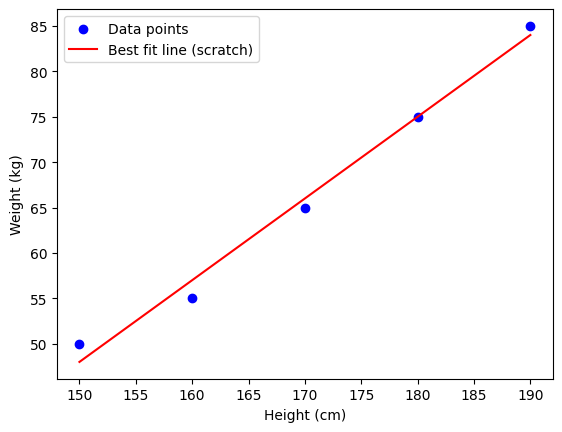

In [3]:

# Calculate slope (W1) and intercept (W0) using least squares
x_mean = np.mean(X)
y_mean = np.mean(y)

W1 = np.sum((X.flatten() - x_mean) * (y - y_mean)) / np.sum((X.flatten() - x_mean)**2)
W0 = y_mean - W1 * x_mean

print(f"From Scratch → Intercept (W0): {W0:.2f}, Slope (W1): {W1:.2f}")

# Predictions
y_pred_scratch = W0 + W1 * X
mse_scratch = mean_squared_error(y, y_pred_scratch)
print("MSE (Scratch):", mse_scratch)

# Plot
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, y_pred_scratch, color="red", label="Best fit line (scratch)")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.legend()
plt.show()


### 🔹 Using Scikit-Learn

Sklearn → Intercept (W0): -87.00, Slope (W1): 0.90
MSE (Sklearn): 2.0


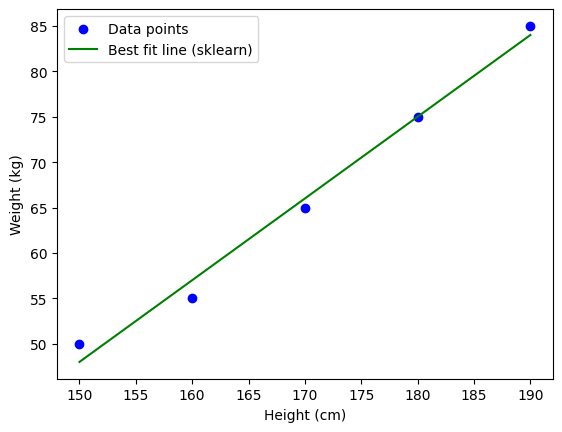

In [4]:

model = LinearRegression()
model.fit(X, y)
y_pred_sklearn = model.predict(X)

print(f"Sklearn → Intercept (W0): {model.intercept_:.2f}, Slope (W1): {model.coef_[0]:.2f}")
print("MSE (Sklearn):", mean_squared_error(y, y_pred_sklearn))

# Plot
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, y_pred_sklearn, color="green", label="Best fit line (sklearn)")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.legend()
plt.show()



# 📈 Multiple Linear Regression (Height + Age → Weight)
We extend to two predictors: **Height** and **Age**.


In [5]:

# Sample dataset: Height (cm), Age (years), Weight (kg)
X_multi = np.array([
    [150, 20],
    [160, 22],
    [170, 24],
    [180, 26],
    [190, 28]
])
y_multi = np.array([52, 58, 65, 75, 87])


### 🔹 From Scratch (Normal Equation)

In [8]:
# Add bias term (intercept)
X_b = np.c_[np.ones((X_multi.shape[0], 1)), X_multi]

# Use pseudo-inverse instead of direct inverse
W = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_multi)

print("From Scratch Weights:", W)

# Predictions
y_pred_multi_scratch = X_b.dot(W)
print("MSE (Scratch):", mean_squared_error(y_multi, y_pred_multi_scratch))


From Scratch Weights: [-0.81136184 -0.72377276  7.96886382]
MSE (Scratch): 3.260000000000006


### 🔹 Using Scikit-Learn

In [9]:

model_multi = LinearRegression()
model_multi.fit(X_multi, y_multi)
y_pred_multi_sklearn = model_multi.predict(X_multi)

print("Sklearn Intercept:", model_multi.intercept_)
print("Sklearn Coefficients:", model_multi.coef_)
print("MSE (Sklearn):", mean_squared_error(y_multi, y_pred_multi_sklearn))


Sklearn Intercept: -78.82692307692312
Sklearn Coefficients: [0.83653846 0.16730769]
MSE (Sklearn): 3.2599999999999896



# 📉 Polynomial Regression (Height → Weight)
We model the relationship as a **quadratic curve** instead of a straight line.


### 🔹 From Scratch (Manual Polynomial Features)

From Scratch Polynomial Weights: [ 1.18000000e+02 -1.52857143e+00  7.14285714e-03]
MSE (Scratch): 0.5714285714285641


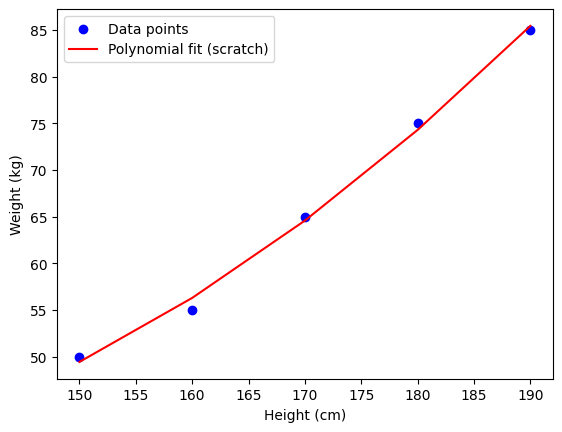

In [10]:

# Create polynomial features manually [1, x, x^2]
X_poly = np.c_[np.ones((X.shape[0], 1)), X, X**2]

# Normal equation
W_poly = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)
print("From Scratch Polynomial Weights:", W_poly)

# Predictions
y_pred_poly_scratch = X_poly.dot(W_poly)
print("MSE (Scratch):", mean_squared_error(y, y_pred_poly_scratch))

# Plot
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, y_pred_poly_scratch, color="red", label="Polynomial fit (scratch)")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.legend()
plt.show()


### 🔹 Using Scikit-Learn

Sklearn Polynomial Coefficients: [ 0.         -1.52857143  0.00714286]
Sklearn Polynomial Intercept: 118.00000000006855
MSE (Sklearn): 0.5714285714285771


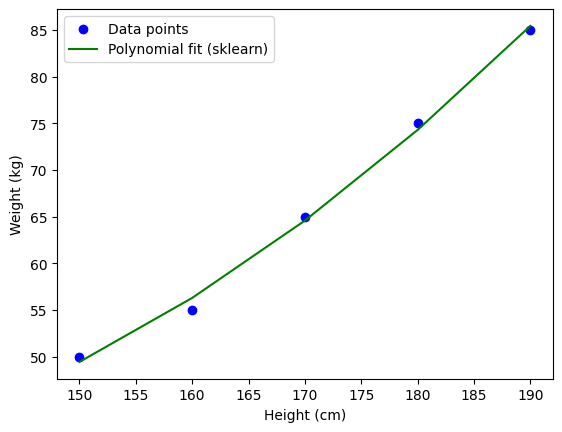

In [11]:

poly = PolynomialFeatures(degree=2)
X_poly_sklearn = poly.fit_transform(X)

model_poly = LinearRegression()
model_poly.fit(X_poly_sklearn, y)
y_pred_poly_sklearn = model_poly.predict(X_poly_sklearn)

print("Sklearn Polynomial Coefficients:", model_poly.coef_)
print("Sklearn Polynomial Intercept:", model_poly.intercept_)
print("MSE (Sklearn):", mean_squared_error(y, y_pred_poly_sklearn))

# Plot
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, y_pred_poly_sklearn, color="green", label="Polynomial fit (sklearn)")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.legend()
plt.show()



# ✅ Summary

- **Simple Linear Regression**: One predictor, best-fit line  
- **Multiple Linear Regression**: Multiple predictors, regression plane  
- **Polynomial Regression**: Non-linear curve, still linear in coefficients  

We implemented each **from scratch** (using least squares / normal equation) and using **Scikit-Learn**.  
MSE was used to measure error in each case.
